# Principal Component Analysis

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [3]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)  # 50
number_feature  = np.size(feature, 1)  # 2

print(x)
print(y)
print(number_data)
print(number_feature)

[3.38156 4.52788 2.65568 2.76523 2.84656 3.89067 3.47581 5.9113  3.92889
 4.56184 4.57407 4.37173 4.19169 5.24409 2.83584 5.63527 4.68633 2.85051
 5.11016 5.18256 5.70733 3.57968 5.63938 4.26347 2.53652 3.22383 4.92949
 5.79296 2.81685 3.88882 3.34323 5.87973 3.10392 5.33151 3.37543 4.77668
 2.67575 5.50028 1.7971  4.32251 4.421   3.1793  3.03354 4.60935 2.96379
 3.97176 1.18023 1.91895 3.95525 5.11795]
[3.38911 5.85418 4.41199 3.71541 4.17551 6.48838 3.63285 6.68077 5.09845
 5.6233  5.39765 5.46117 4.95469 4.66149 3.76802 6.31211 5.66524 4.62646
 7.3632  4.64651 6.68104 4.80278 6.12044 4.68943 3.88449 4.94256 5.95502
 5.10839 4.81896 5.10037 5.89301 5.52142 3.8571  4.68074 4.56538 6.25435
 3.73097 5.67948 3.24754 5.1111  6.02564 4.43686 3.97879 5.87979 3.30025
 5.40774 2.87869 5.07108 4.50533 6.08507]
50
2


## plot the input data

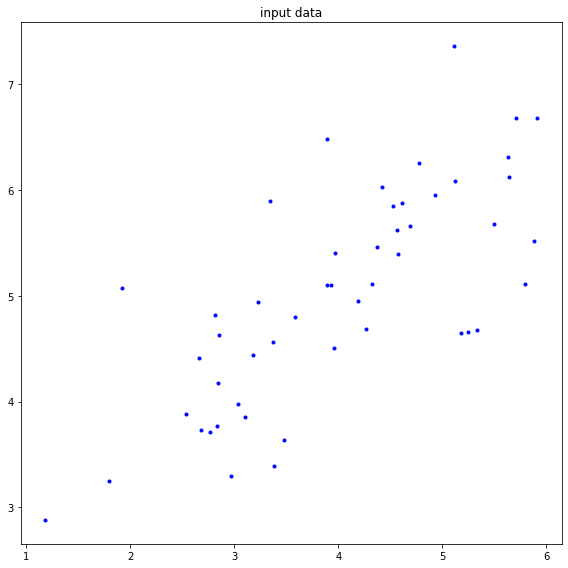

In [4]:
def plot_data(X, Y):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    # ===================================================
    # fill up the blank
    
    plt.plot(X, Y, '.', color = 'blue')
    
    # ===================================================
    plt.tight_layout()
    plt.show()

plot_data(x, y)

## Normalization (Z-scoring)

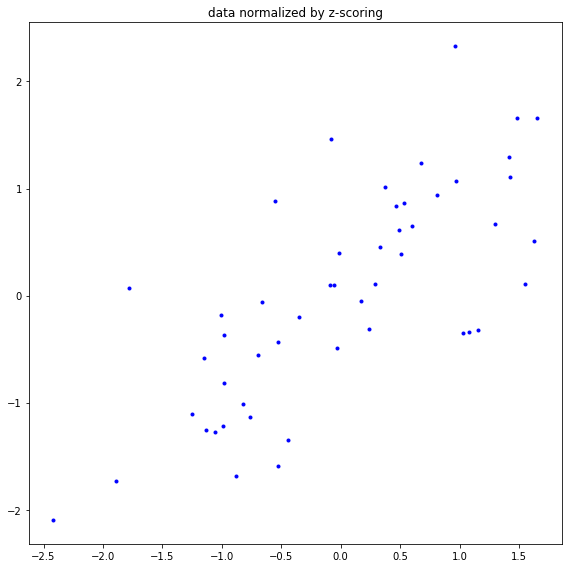

In [65]:
def normalization(X, Y):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    # ===================================================
    # fill up the blank
    
    X = (X - np.mean(X))/np.std(X)
    Y = (Y - np.mean(Y))/np.std(Y)
    
    plt.plot(X, Y, '.', color = 'blue')

    # ===================================================
    plt.tight_layout()
    plt.show()
    
    return X, Y
    
# normalization
x, y = normalization(x, y)
feature = np.zeros(shape=(number_data, number_feature))
feature[:,0] = x
feature[:,1] = y

## compute covariance matrix

In [67]:
def compute_covariance(feature):
    # ===================================================
    # fill up the function body
    
    Sigma = np.cov(feature.T)
    
    # ===================================================
    return Sigma

s = compute_covariance(feature)

## compute principal directions

In [52]:
def compute_eigen(feature):
    # ===================================================
    # fill up the function body
    
    sigma = compute_covariance(feature)
    S, U = np.linalg.eig(sigma)
    print(S)
    
    # S 를 대각행렬로 변환
    temp = np.identity(number_feature)
    for i in range(number_feature):
        temp[i][i] = S[i]
    S = temp
    print(S)
    print(U)
    
    # ===================================================
    return S, U

S, U = compute_eigen(feature)

[[1.02040816 0.75054082]
 [0.75054082 1.02040816]]
[1.77094898 0.26986734]
[[1.77094898 0.        ]
 [0.         0.26986734]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


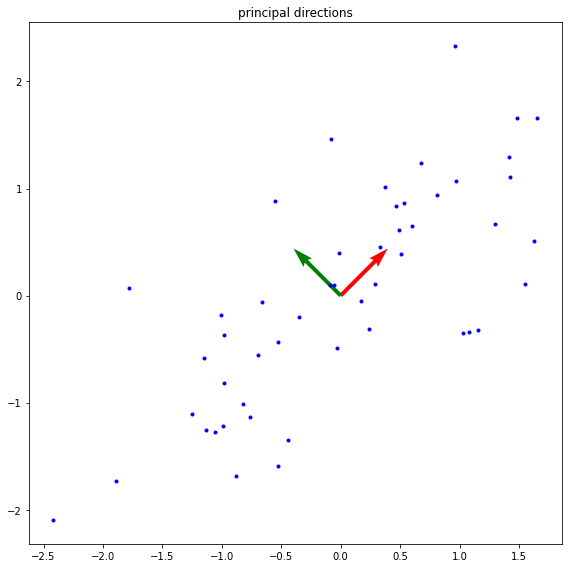

In [58]:
def plot_principal_directions(x, y):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')
    # ===================================================
    # fill up the blank
    
    origin = np.zeros(shape=(number_feature, number_feature))
    plt.quiver(*origin, *U, color=['r', 'g'], scale=8)
    plt.plot(x, y, '.', color = 'blue')
    
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_principal_directions(x, y)

## first principal axis

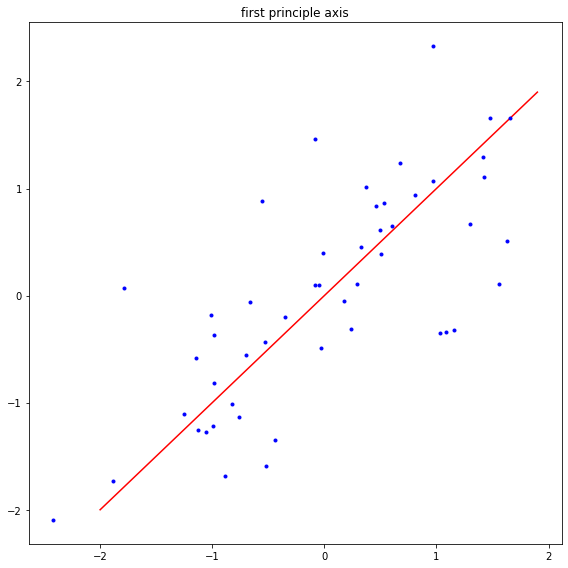

In [68]:
def plot_first_principal_axis(U):

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')
    # ===================================================
    # fill up the blank
    XX = np.arange(-2, 2, 0.1)
    YY = -(1/U[0,1])*(U[0,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')

    # ===================================================
    plt.tight_layout()
    plt.show()

plot_first_principal_axis(U)

## second principal axis

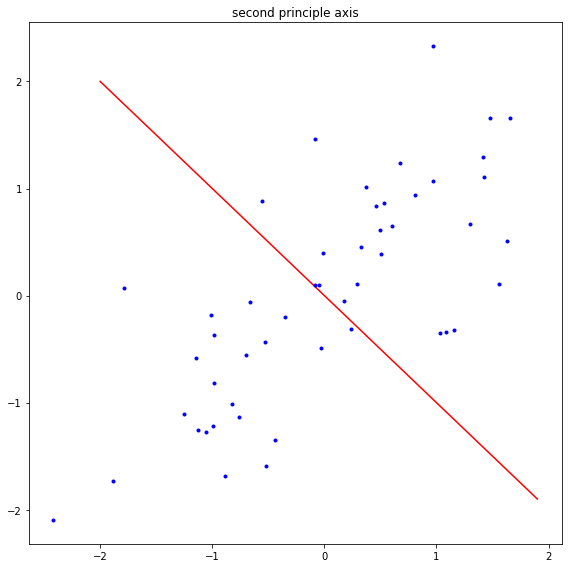

In [69]:
def plot_second_principal_axis(U_1):

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    # ===================================================
    # fill up the blank
    
    XX = np.arange(-2, 2, 0.1)
    YY = -(1/U[1,1])*(U[1,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')

    # ===================================================
    plt.tight_layout()
    plt.show()
             
plot_second_principal_axis(U)

## compute the projection of point onto the line

In [71]:
def compute_projection_onto_line(x, y, vector):  # vector <- U
    # ===================================================
    # fill up the function body

    norm = (vector).dot(vector.T)
    
    projection = np.zeros(shape=(number_data, number_feature))
    for i in range(number_data):
        projection[i] = (vector.dot((np.array([x[i], y[i]])).T)/norm)*vector
    
#     print(projection)
    # ===================================================
    return projection

U0_projection = compute_projection_onto_line(x, y, U[:,0])
U1_projection = compute_projection_onto_line(x, y, U[:,1])

## projcet to the first principal axis

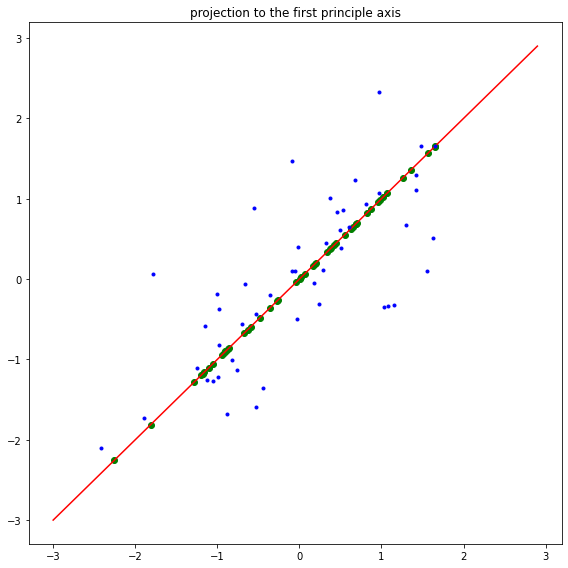

In [106]:
def plot_project_to_first_principal_axis(x, y, U):

    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    # ===================================================
    # fill up the blank
    
    proj = compute_projection_onto_line(x, y, U[:,0])
    plt.plot(proj[:,0], proj[:,1], 'o', color = 'green')

    XX = np.arange(-2.5, 2.5, 0.1)
    YY = (-1/U[0,1])*(U[0,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')
    
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_project_to_first_principal_axis(x, y, U)

## projcet to the second principal axis

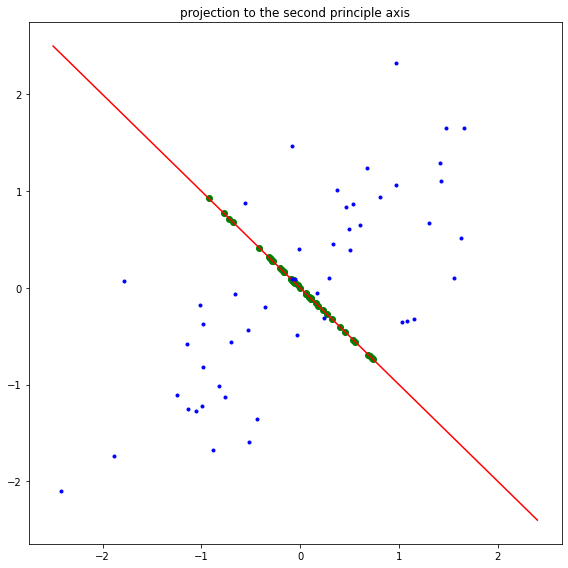

In [107]:
def plot_project_to_second_principal_axis(x, y, U):

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    # ===================================================
    # fill up the blank

    proj = compute_projection_onto_line(x, y, U[:,1])
    plt.plot(proj[:,0], proj[:,1], 'o', color = 'green')


    XX = np.arange(-2.5, 2.5, 0.1)
    YY = (-1/U[1,1])*(U[1,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')
    
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_project_to_second_principal_axis(x, y, U)

## connect original data to the projection onto the first principal axis

-0.523315100651543 -1.5927948938861498
-1.0580549972688464 -1.058054997268846


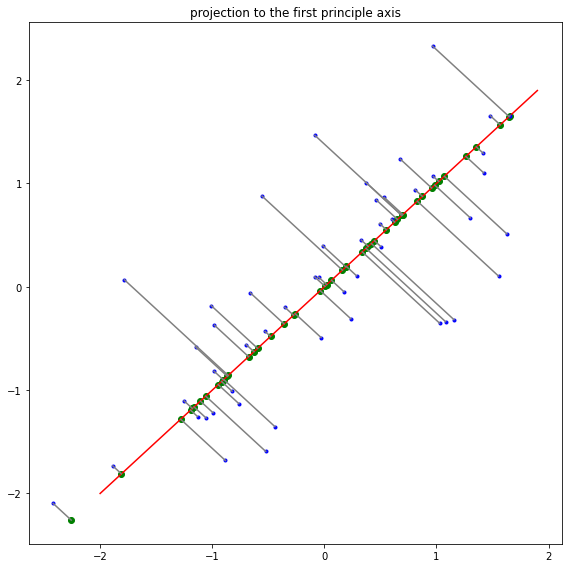

In [104]:
def plot_projection_to_the_first_principle_axis(x, y, U):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    # ===================================================
    # fill up the blank

    proj = compute_projection_onto_line(x, y, U[:,0])
    plt.plot(proj[:,0], proj[:,1], 'o', color = 'green')

    XX = np.arange(-2, 2, 0.1)
    YY = (-1/U[0,1])*(U[0,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')
    
    for i in range(number_data):
        X = np.array([feature[i,0],proj[i,0]])
        Y = np.array([feature[i,1],proj[i,1]])
        plt.plot(X, Y, '-', color = 'grey')
    
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_projection_to_the_first_principle_axis(x, y, U)

## connect original data to the projection onto the second principal axis

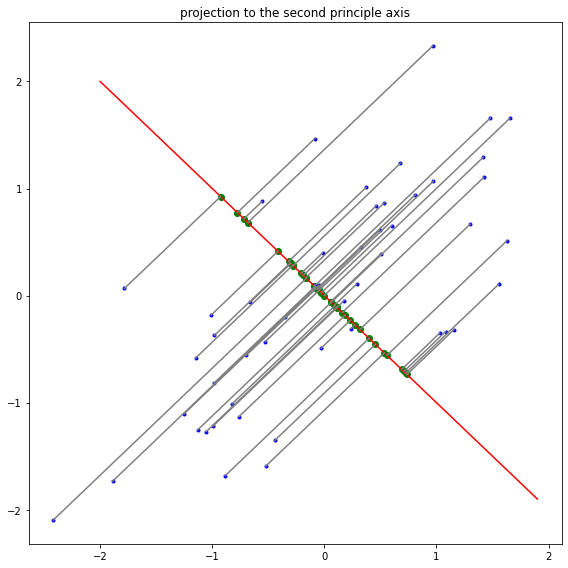

In [108]:
def plot_projection_to_the_second_principle_axis(x, y, U): 
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    # ===================================================
    # fill up the blank
    
    proj = compute_projection_onto_line(x, y, U[:,1])
    plt.plot(proj[:,0], proj[:,1], 'o', color = 'green')

    XX = np.arange(-2, 2, 0.1)
    YY = (-1/U[1,1])*(U[1,0]*XX)
    plt.plot(XX, YY, color='red')

    plt.plot(x, y, '.', color = 'blue')
    
    for i in range(number_data):
        X = np.array([feature[i,0],proj[i,0]])
        Y = np.array([feature[i,1],proj[i,1]])
        plt.plot(X, Y, '-', color = 'grey')
    
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_projection_to_the_second_principle_axis(x, y, U)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

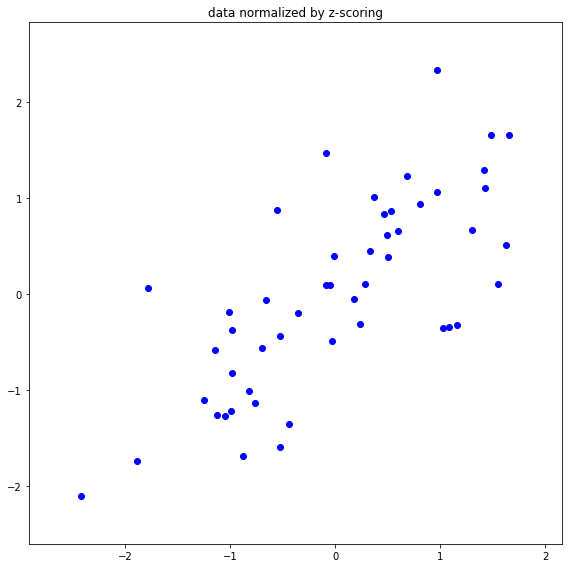

In [122]:
plot_data()

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

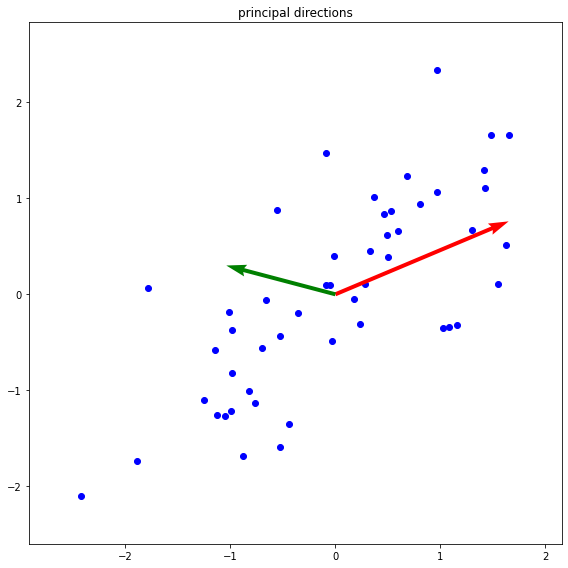

***

### 3. plot the first principal axis in red on the normalized data in blue

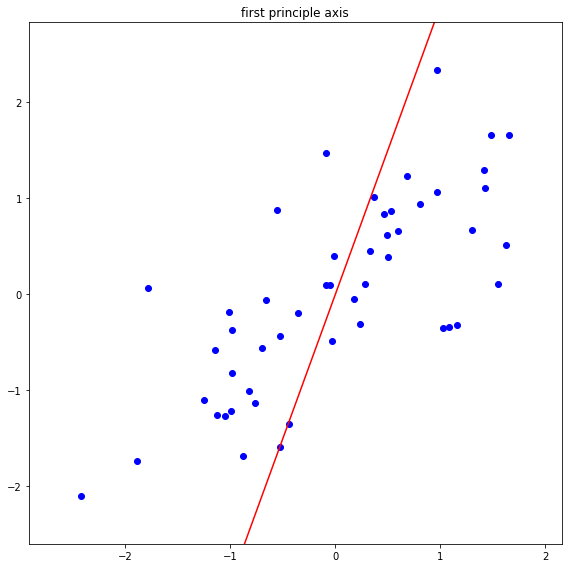

***

### 4. plot the second principal axis in red on the normalized data in blue

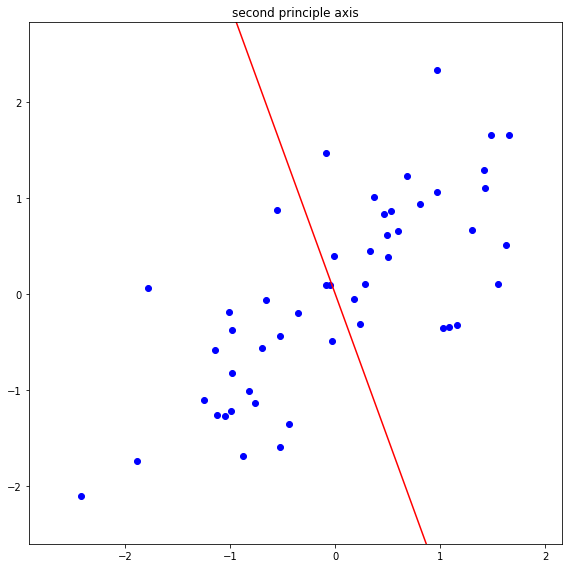

***

### 5. plot the projection of data in green onto the first principal axis in red

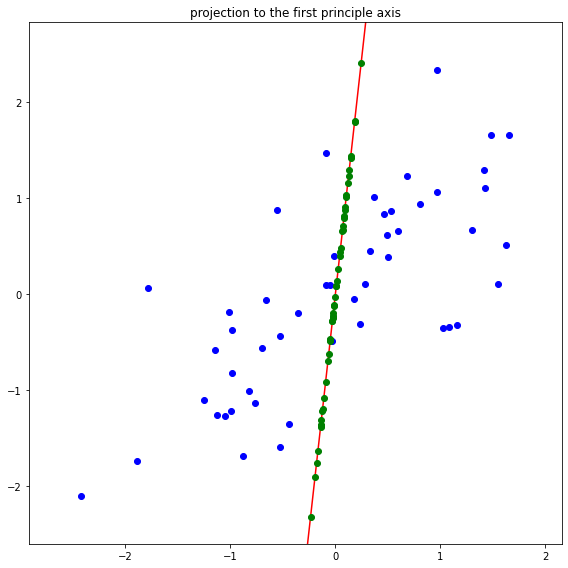

***

### 6. plot the projection of data in green onto the second principal axis in red

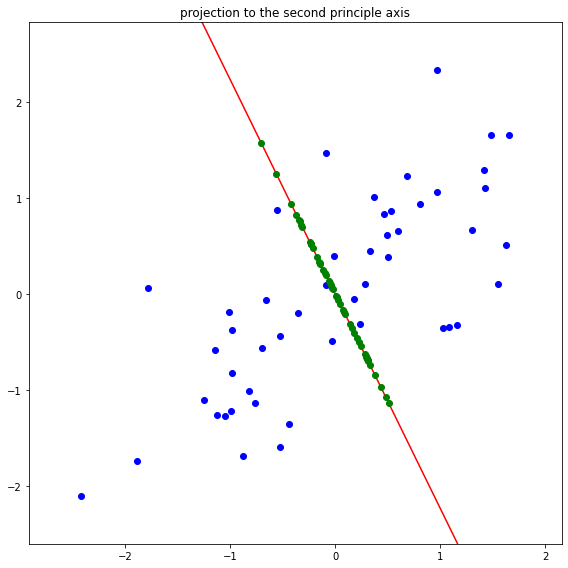

***

### 7. plot the projection line in grey onto the first principal axis

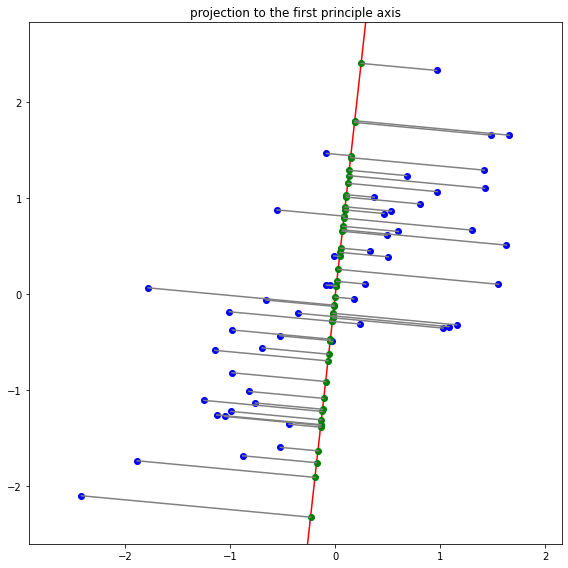

***

### 8. plot the projection line in grey onto the second principal axis

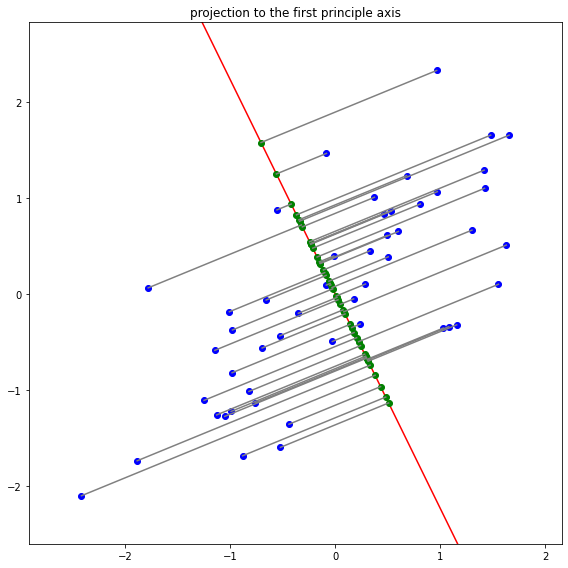

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***